# Titanic - with Decision Tree

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Titanica Dataset

In [4]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape

(891, 12)

# Some Data Exploration

### How many Survived and Deads?

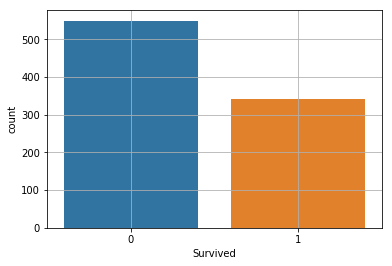

In [5]:
sns.countplot(data=df_titanic, x='Survived')
plt.grid()

### How many male and female?

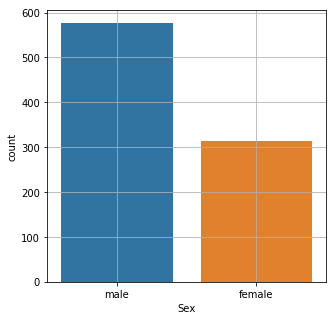

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes()
sns.countplot(data=df_titanic, x='Sex', ax=ax)
plt.grid()

### Plot the distribution of the Fare based on classes

C:\Users\karlo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


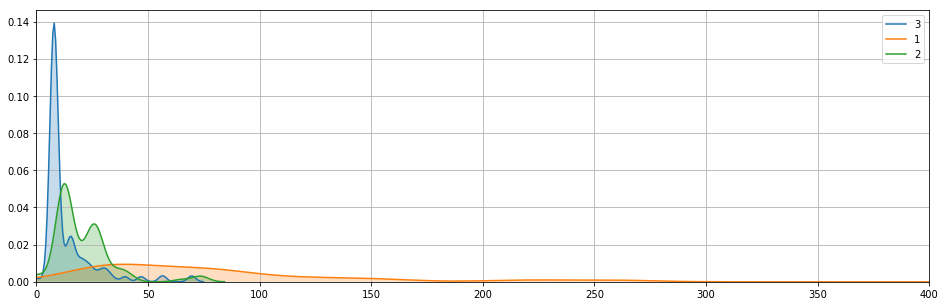

In [7]:
fig = plt.figure(figsize=(16, 5))
for class_ in df_titanic['Pclass'].unique():
    sns.kdeplot(df_titanic[df_titanic['Pclass']==class_]['Fare'], 
                label=class_, shade=True)
plt.xlim(0,400)
plt.grid()

In [ ]:
# we can see the median of the fare for each class

In [8]:
df_titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df_titanic[df_titanic['Pclass']==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.00,1,0,11668,21.0000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,1,0,2926,26.0000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.00,0,0,C.A. 31026,10.5000,NaN,S


In [10]:
df_titanic[df_titanic["Fare"] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [5]:
from sklearn.model_selection import train_test_split

NOTICE the Stratification

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic.drop('Survived', axis=1), 
                                                    df_titanic['Survived'], 
                                                    stratify=df_titanic['Survived'],
                                                   random_state= 10)

In [8]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
744,745,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
873,874,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
643,644,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


# Check the ratio of Survived in train and test sets

### Is it true that the % of survived in Train is similar to the % of Survived in the Test?

In [9]:
# Check the % of Survived in y_train and y_test
ratio_train = 100 * y_train.sum() / len(y_train)
print(ratio_train)

38.32335329341317


In [10]:
ratio_test = 100 * y_test.sum() / len(y_test)
print(ratio_test)

38.56502242152467


## Plot the number of Survived and Dead people in y_train and y_test

In [11]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Check the distributions of the train and test features in train and test sets

In [12]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,545.000000,668.000000,668.000000,668.000000
mean,445.908683,2.323353,29.675982,0.543413,0.386228,31.723721
std,254.771442,0.825162,14.578365,1.135327,0.814370,50.328303
min,1.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,229.750000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,447.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,660.000000,3.000000,38.000000,1.000000,0.000000,31.068750
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
X_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,223.000000,223.000000,169.000000,223.000000,223.000000,223.000000
mean,446.273543,2.264574,29.773728,0.461883,0.367713,33.643515
std,265.523504,0.868337,14.400682,0.998706,0.782257,47.822537
min,7.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,207.500000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,440.000000,3.000000,29.000000,0.000000,0.000000,15.245800
75%,685.000000,3.000000,39.000000,1.000000,0.000000,30.250000
max,888.000000,3.000000,63.000000,8.000000,5.000000,263.000000


In [14]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
X_train.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            123
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          520
Embarked         1
dtype: int64

In [16]:
feat_to_use = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']

def feature_selector(df, feature_list):
    return df[feature_list].copy()

In [17]:
X_train = feature_selector(X_train, feat_to_use)

In [18]:
X_train.isnull().sum(axis=0)

Pclass    0
SibSp     0
Parch     0
Fare      0
Sex       0
dtype: int64

In [19]:
X_train.head()

,Pclass,SibSp,Parch,Fare,Sex
744,3,0,0,7.9250,male
873,3,0,0,9.0000,male
593,3,0,2,7.7500,female
643,3,0,0,56.4958,male
872,1,0,0,5.0000,male


# One hot encoding of Sex

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
sex_encoded = ohe.fit_transform(X_train[['Sex']])

df = pd.DataFrame(sex_encoded)
df.columns = list(ohe.categories_[0])

X_train = pd.concat([X_train.reset_index(drop=True), df], axis=1)
X_train = X_train.drop('Sex', axis=1)

In [21]:
X_train

,Pclass,SibSp,Parch,Fare,female,male
0,3,0,0,7.9250,0.0,1.0
1,3,0,0,9.0000,0.0,1.0
2,3,0,2,7.7500,1.0,0.0
3,3,0,0,56.4958,0.0,1.0
4,1,0,0,5.0000,0.0,1.0
5,1,0,1,61.3792,0.0,1.0
6,1,0,0,31.0000,0.0,1.0
7,2,1,0,30.0708,1.0,0.0
8,2,0,0,33.0000,1.0,0.0
9,3,0,0,7.8542,1.0,0.0


# Use a DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [23]:
model = DecisionTreeClassifier(max_depth=4, random_state= 10)

In [24]:
y_train.shape

(668,)

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

# Evaluation of the model with cross validation

In [26]:
from sklearn.model_selection import cross_validate
pd.DataFrame(cross_validate(model, X_train, y_train, cv=5))

C:\Users\karlo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,fit_time,score_time,test_score,train_score
0,0.004022,0.001997,0.785185,0.821764
1,0.002994,0.001992,0.761194,0.812734
2,0.003983,0.001994,0.781955,0.824299
3,0.002986,0.000995,0.812030,0.805607
4,0.002999,0.001990,0.766917,0.811215


# Are we happy? Try with GridSearch for Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid={'max_depth': np.arange(1, 10, 2), 
                                       'min_samples_leaf': np.arange(40,50)}, cv=5)
grid.fit(X_train, y_train);

In [28]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 40}

# Ok we found the best hyperparameters for the tree!

In [36]:
#!pip install graphviz

In [30]:
import graphviz

In [31]:
dot_data = tree.export_graphviz(grid.best_estimator_, out_file=None, 
                     class_names=X_train.columns,  
                     feature_names=X_train.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Evaluation on test set

In [36]:
def one_hot_encoding_test_set(test_set, one_hot_enc):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder(sparse=False)
    sex_encoded = ohe.fit_transform(test_set[['Sex']])

    df = pd.DataFrame(sex_encoded)
    df.columns = list(ohe.categories_[0])

    test_set = pd.concat([test_set.reset_index(drop=True), df], axis=1)
    test_set = test_set.drop('Sex', axis=1)
    return test_set

In [37]:
feat_to_use = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
X_test = feature_selector(X_test, feat_to_use)

In [34]:
X_test

,Pclass,SibSp,Parch,Fare,Sex
193,2,1,1,26.0000,male
471,3,0,0,8.6625,male
682,3,0,0,9.2250,male
565,3,2,0,24.1500,male
103,3,0,0,8.6542,male
140,3,0,2,15.2458,female
8,3,0,2,11.1333,female
384,3,0,0,7.8958,male
430,1,0,0,26.5500,male
407,2,1,1,18.7500,male


In [38]:
X_test = one_hot_encoding_test_set(X_test, label_bin)

NameError: name 'label_bin' is not defined

In [1430]:
predictions = model.predict(X_test)

In [1431]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       137
           1       0.71      0.72      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



A more elaborated study is found here: PLEASE FIND THE COMPLETE EXAMPLE HERE: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8